<a href="https://colab.research.google.com/github/azizfath/bddm3/blob/main/20_11_3694_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UAS BIG DATA & DATA MINING**
##"Cervical Cancer Prediction by Classification using Support Vector Machines Algorithm"

# Identitas


*   **Nim: 20.11.3694**
*   **Nama: Fathurrahman Nur Aziz**
*   **Kelas: 20IF07**




#Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import *
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#LOAD DATASET

*   DATAFRAME diambil dari KAGGLE : https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification
*   Kemudian saya taruh di github untuk mempermudah proses import : https://raw.githubusercontent.com/azizfath/bddm3/main/uas/kag_risk_factors_cervical_cancer.csv'


In [2]:
url = 'https://raw.githubusercontent.com/azizfath/bddm3/main/uas/kag_risk_factors_cervical_cancer.csv'
#url = '/content/kag_risk_factors_cervical_cancer.csv'

df = pd.read_csv(url)

## 1. Data Visualization

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.shape

(858, 36)

In [5]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

## 2. Data Preprocessing (Data Cleaning)

####Dari Dataset tersebut, terlihat ada data yang berisi "?", kita lakukan preprocessing terlebih dahulu untuk seluruh data "?"

In [6]:
#mengubah data "?" menjadi Null Values
for col in df.columns:
    df[col].replace('?',np.nan,inplace=True )

In [7]:
#cek null
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

dari informasi null tersebut, kolom '**STDs: Time since first diagnosis**' dan '**STDs: Time since last diagnosis**' memiliki terlalu banyak nilai null, sehingga kita drop saja

In [8]:
#drop kolom 'STDs: Time since first diagnosis' dan 'STDs: Time since last diagnosis'
df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace=True)

In [9]:
#cek null lagi
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [10]:
#drop null baris null yang lain
df.dropna(inplace=True)
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [11]:
#cek hasil akhir jumlah kolom dan baris
df.shape

(668, 34)

In [12]:
#mengubah seluruh tipe data menjadi float
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    float64
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

In [13]:
#lihat deskripsi statistik
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,...,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,...,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Dari deskripsi statistik diatas, dapat disimpulkan bahwa
* Nilai maksimum dari "Age" adalah 84, yang mana nilainya terlalu besar jika dibandingkan dengan nilai maksimum pada kolom lain, sehingga perlu dilakukan standarisasi skala seluruh kolom agar tidak mengganggu proses klasifikasi
* Nilai maksimal dari "Num of pregnanices" adalah 11 dimana rata-ratanya hanya sebesar 2 sehingga dapat disimpulkan bahwa nilai 11 adalah outlier dari kolom tersebut
* Kolom "STDs:cervical condylomatosis" dan "STDs:AIDS" hanya berisi nilai 0 yang membuat fitur tersebut tidak berguna. sehingga kita perlu drop.
* Kolom "Dx:CIN", "Dx:HPV" tidak berhubungan dengan diagnosis kanker serviks, dan kolom "Dx" hanya merupakan jumlah diagnosis sehingga tidak berkaitan dan perlu di drop

In [14]:
#menghapus kolom tidak berguna
df.drop(columns = ['STDs:cervical condylomatosis', 'STDs:AIDS', 'Dx:CIN', 'Dx:CIN', 'Dx'], inplace=True)

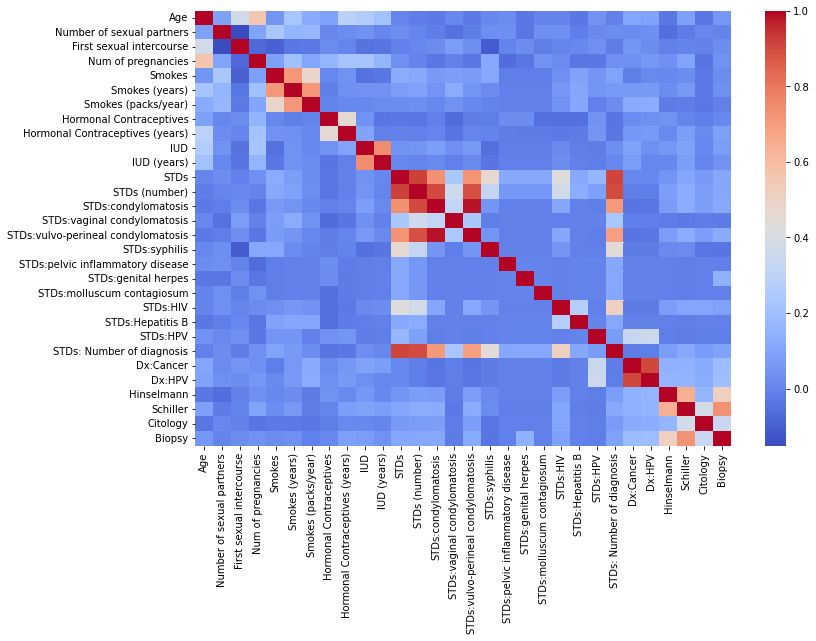

In [15]:
#cek korelasi kolom
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')

In [16]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)

##3. Exploratory Data Analysis

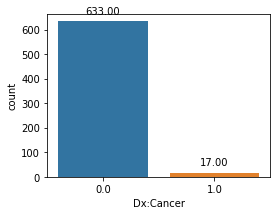

In [17]:
#melihat hasil diagnosis kanker serviks
plt.figure(figsize=(4, 3))
splot = sns.countplot(df['Dx:Cancer'])
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Dari hasil EDA tersebut, dapat kita lihat bahwa terdapat 633 data negatif dan 17 data positif yang artinya class tersebut tidak balance sehingga dapat membuat performance tidak bagus.
Tetapi untuk sementara kita abaikan terlebih dahulu.

##4. Feature Selection

In [18]:
#seleksi dataframe menjadi fitur dan target

col = df.columns

#independent variable adalah seluruh kolom selain Dx:Cancer
X = df.iloc[:, col != 'Dx:Cancer'].values

#dependent variable adalah kolom Dx:Cancer
y = df[['Dx:Cancer']].values

In [19]:
#standaridasi values berdasarkan analisis deskripsi statistik sebelumnya

std = StandardScaler()
X = std.fit_transform(X)

In [20]:
#menampilkan 5 nilai awal X dan y
print(f'X: \n {X[:5]}')
print(f'y: \n {y[:5]}')

X: 
 [[-1.09209185  0.8799257  -0.75975637 -0.91936906 -0.41627539 -0.29925615
  -0.19940107 -1.37905247 -0.62423406 -0.36115756 -0.26894667 -0.33333333
  -0.30629694 -0.24568046 -0.07868895 -0.24214029 -0.15369466 -0.03925343
  -0.03925343 -0.03925343 -0.14285714 -0.03925343 -0.05555556 -0.30377561
  -0.15886029 -0.21997067 -0.32471861 -0.24918167 -0.26945734]
 [-1.43724243 -0.93964494 -1.10925506 -0.91936906 -0.41627539 -0.29925615
  -0.19940107 -1.37905247 -0.62423406 -0.36115756 -0.26894667 -0.33333333
  -0.30629694 -0.24568046 -0.07868895 -0.24214029 -0.15369466 -0.03925343
  -0.03925343 -0.03925343 -0.14285714 -0.03925343 -0.05555556 -0.30377561
  -0.15886029 -0.21997067 -0.32471861 -0.24918167 -0.26945734]
 [ 2.81961477  1.48644925 -0.41025769  1.12018687  2.40225588  8.42102868
  15.44279945  0.72513557  0.1749288  -0.36115756 -0.26894667 -0.33333333
  -0.30629694 -0.24568046 -0.07868895 -0.24214029 -0.15369466 -0.03925343
  -0.03925343 -0.03925343 -0.14285714 -0.03925343 -0.05

##5. Classification Model and Prediction

In [21]:
#split dataset dengan test size 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
#print bentuk dari hasil data split
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (487, 29)
X_test shape:  (163, 29)
y_train shape:  (487, 1)
y_test shape:  (163, 1)


In [23]:
#membuat model klasifikasi dengan SVM
classifierSVM= svm.SVC(kernel='linear')

In [24]:
#training model klasifikasi
classifierSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
#melakukan prediksi
SVM_pred = classifierSVM.predict(X_test)

In [26]:
#menampilkan hasil prediksi 15 kolom pertama
print('index \t cancer');
for i,y in enumerate(SVM_pred[:15]):
  print(f'{i} \t {y}')

index 	 cancer
0 	 0.0
1 	 0.0
2 	 0.0
3 	 0.0
4 	 0.0
5 	 0.0
6 	 0.0
7 	 0.0
8 	 0.0
9 	 0.0
10 	 0.0
11 	 0.0
12 	 0.0
13 	 0.0
14 	 0.0


## 6. Model Evaluation

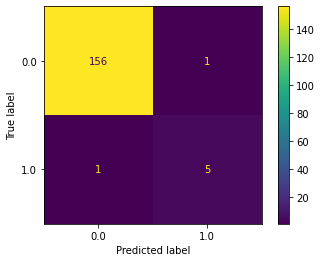

In [27]:
#menampilkan confussion matrix antara Naive Bayes
plot_confusion_matrix(classifierSVM,X_test,y_test)
plt.show()

In [28]:
#menampilkan classification report untuk SVM Classification
print('-------------------------------------------------------')
print('Classification Report for SVM Classification')
print('-------------------------------------------------------')
print(classification_report(y_test,SVM_pred,zero_division=0))

-------------------------------------------------------
Classification Report for SVM Classification
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       157
         1.0       0.83      0.83      0.83         6

    accuracy                           0.99       163
   macro avg       0.91      0.91      0.91       163
weighted avg       0.99      0.99      0.99       163



###ANALISIS

Berdasarkan Confusion Matrix, maka klasifikasi tersebut menghasilkan:

* True Negative : 156
* True Positive : 5
* False Positive : 1
* False Negative : 1

**Maka dapat dikatakan bahwa klasifikasi tersebut dapat benar-benar melakukan prediksi positif ataupun negatif karena nilai false nya sangat sedikit**

Berdasarkan Classification Report, maka klasifikasi tersebut menghasilkan: 
* Akurasi : 99%
* Nilai Presisi Negatif : 99%
* Nilai Presisi Positif : 83%
* Nilai Recall Negatif : 99%
* Nilai Recall Positif : 83%

Artinya: 
* **Berdasakan nilai presisi, maka Algoritma SVM telah bagus dalam melakukan klasifikasi dataset tersebut karena banyak True Positif dengan prediksi yang dilakukan (99% dan 83%)**
* **Berdasarkan nilai Recall, maka Algoritma SVM telah bagus dalam melakukan klasifikasi dataset tersebut karena banyak True Positif yang sesuai dengan class sebenarnya (99% dan 83%)**
* **Nilai akurasi yang cukup tinggi (99%) mengindikasikan bahwa klasifikasi dataset tersebut dengan SVM telah menghasilkan prediksi class yang baik**